In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import numpy as np
import importlib

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf

# %matplotlib notebook


-105717.595767 -303125000.0
574218750000.0 2964296.39527
-1.23424437548e+15 -2.98309326172e+25


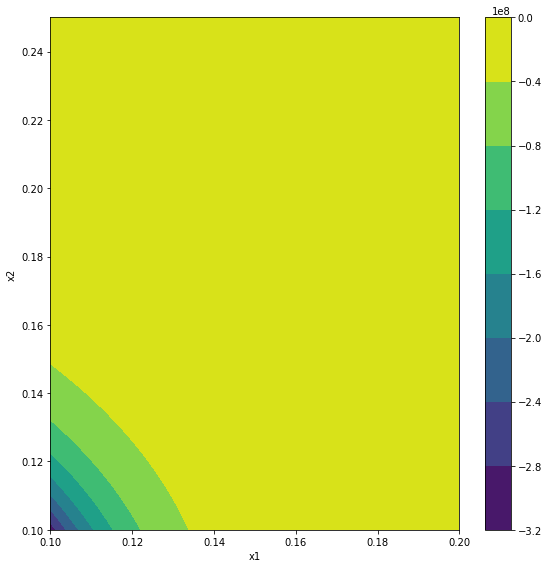

In [2]:
# The phase map of the possible motions of elliptic paritcls. 
# assuming a flow due to point force. 

TrB2_fun = lambda x1, x2, lbd: -2 / ((x1 ** 2 + x2 ** 2) ** 6) * (x2 ** 2 - 3 * lbd ** 2 * x1 ** 2)
TrB3_fun = lambda x1, x2, lbd: 3 / ((x1 ** 2 + x2 ** 2) ** 9) * x1 * lbd * (x2 ** 2 - 2 * lbd ** 2 * x1 ** 2)

lbd = 0.1
x1 = np.linspace(0.1, 0.2, 100)
x2 = np.linspace(0.1, 0.25, 100)
x1, x2 = np.meshgrid(x1, x2)
tr2 = TrB2_fun(x1, x2, lbd)
tr3 = TrB3_fun(x1, x2, lbd)
delta = tr2 ** 3 - 6 * tr3 ** 2
print(tr2.max(), tr2.min())
print(tr3.max(), tr3.min())
print(delta.max(), delta.min())

# fig = plt.figure(figsize=(15, 10))
# fig.patch.set_facecolor('white')
# ax0 = fig.add_subplot(1, 2, 1)
# ax1 = fig.add_subplot(1, 2, 2)
# cf = ax0.contourf(x1, x2, tr2)
# plt.colorbar(cf, ax=ax0, orientation='horizontal')
# ax0.set_xlabel('x1')
# ax0.set_ylabel('x2')
# cf = ax1.contourf(x1, x2, tr3)
# plt.colorbar(cf, ax=ax1, orientation='horizontal')
# ax1.set_xlabel('x1')
# ax1.set_ylabel('x2')
# plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax2 = fig.add_subplot(1, 1, 1)
# cf = ax2.contourf(x1, x2, np.log10(np.abs(delta)))
cf = ax2.contourf(x1, x2, tr2)
plt.colorbar(cf, ax=ax2, orientation='vertical')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
plt.tight_layout()


In [3]:
importlib.reload(jm)
# importlib.reload(spf)

alpha = 1
eval_dt = 0.001
max_iter = 10
fileHandle = 'ShearJefferyProblem'

#     norm = np.random.sample(3)
norm = np.array((1, 0, 0))
center = np.array((0, 0, 0))
ellipse_kwargs = {'name':     'ellipse0',
                  'center':   center,
                  'norm':     norm / np.linalg.norm(norm),
                  'velocity': 0.000,
                  'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
problem = jm.ShearJefferyProblem(planeShearRate=(1, 0, 0))
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))

center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)
print(norm_hist)

ShearJefferyProblem: run 10 loops using 0.000885
[[  1.00000e+00   0.00000e+00  -5.00000e-04]
 [  1.00000e+00   0.00000e+00  -1.00000e-03]
 [  9.99999e-01   0.00000e+00  -1.50000e-03]
 [  9.99998e-01   0.00000e+00  -2.00000e-03]
 [  9.99997e-01   0.00000e+00  -2.50000e-03]
 [  9.99996e-01   0.00000e+00  -3.00000e-03]
 [  9.99994e-01   0.00000e+00  -3.49999e-03]
 [  9.99992e-01   0.00000e+00  -3.99999e-03]
 [  9.99990e-01   0.00000e+00  -4.49998e-03]
 [  9.99988e-01   0.00000e+00  -4.99998e-03]]


ShearJefferyProblem: run 2001 loops using 0.136802


<IPython.core.display.Javascript object>


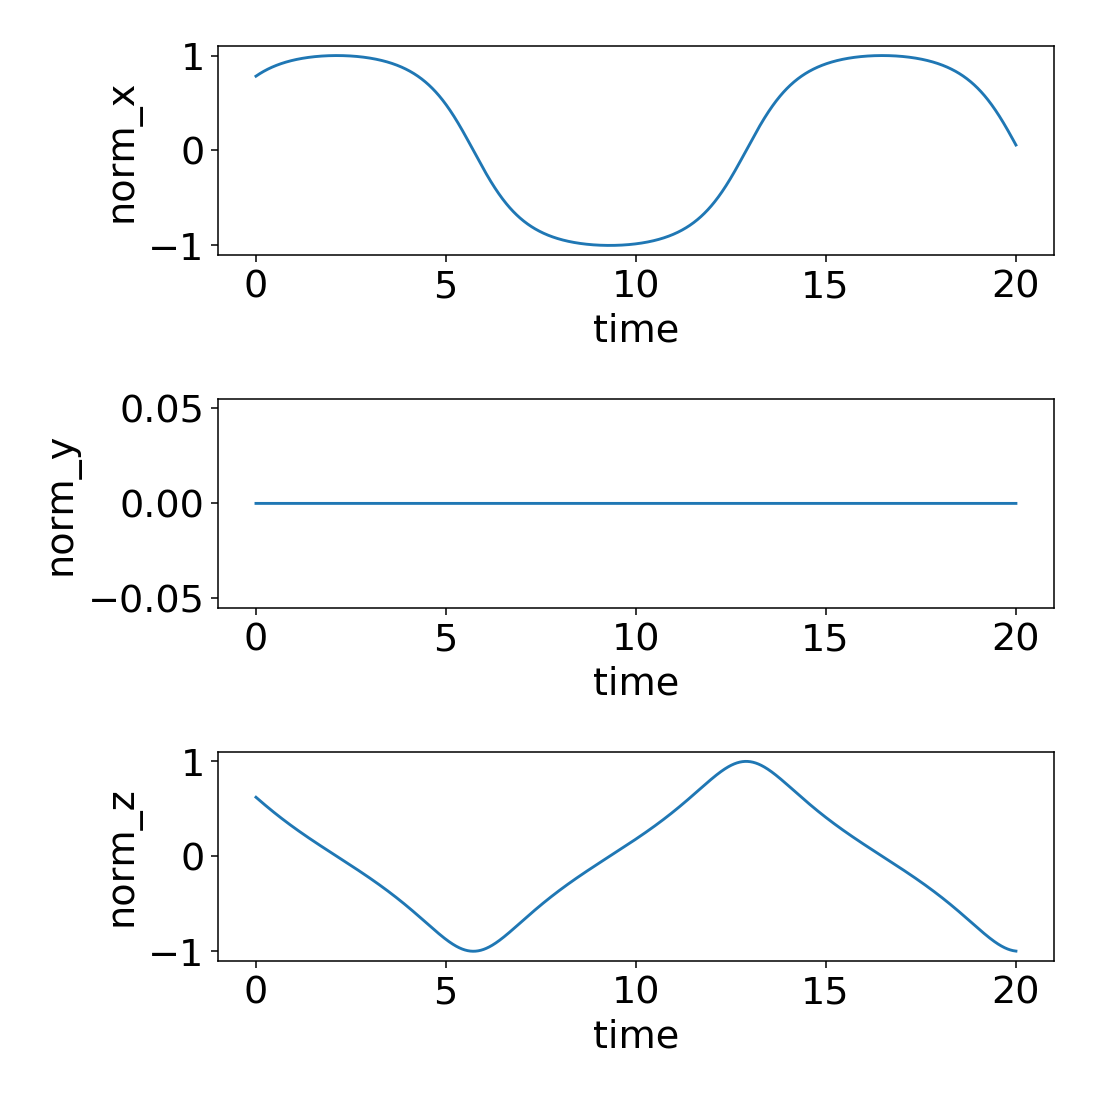

<IPython.core.display.Javascript object>


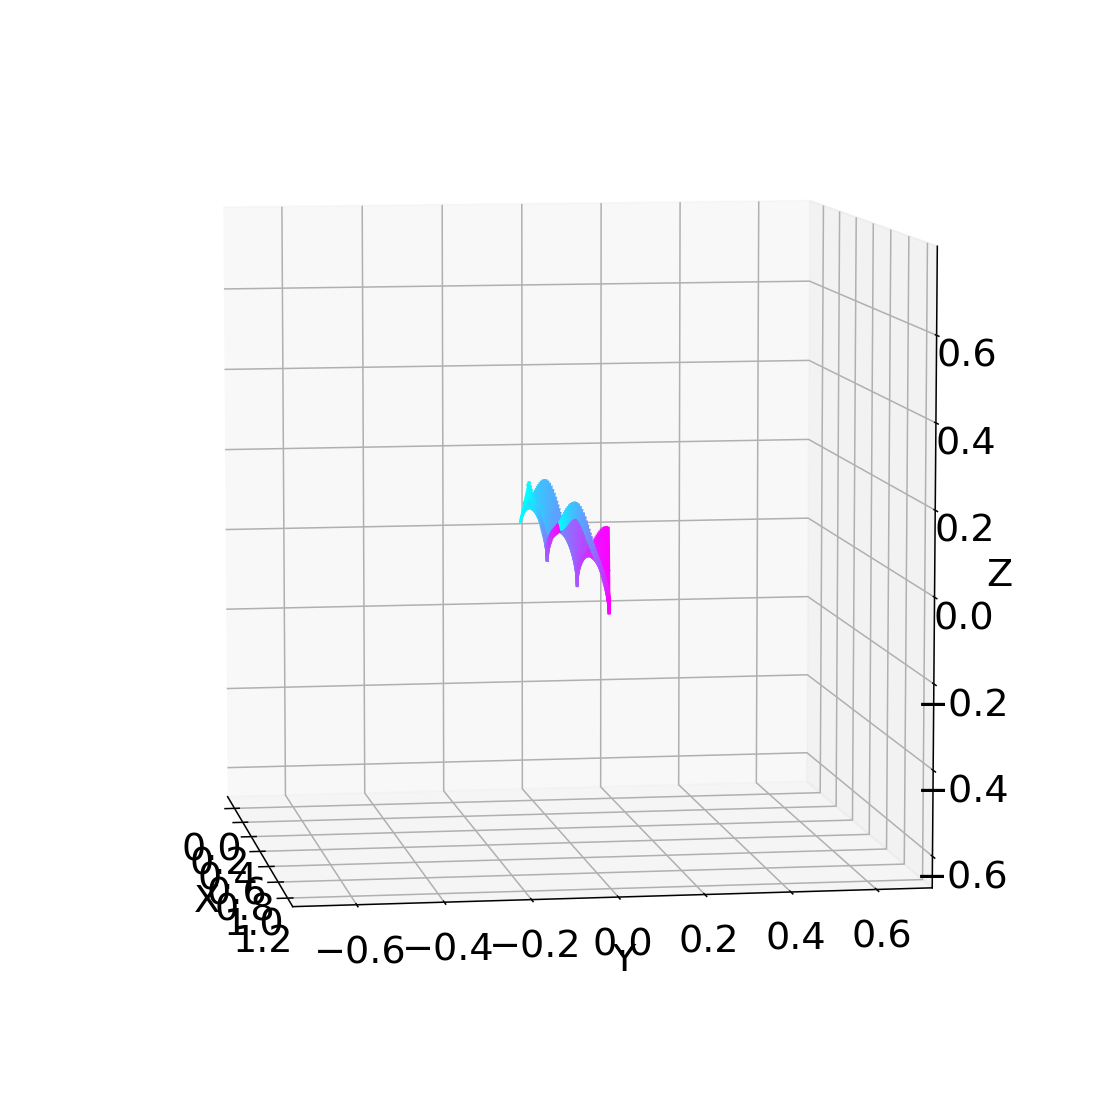

Text(0.5, 0.92, '')

In [11]:
%matplotlib notebook

importlib.reload(jm)
fileHandle = 'ShearJefferyProblem'
eval_dt = 0.01
max_iter = 2001
ellipse_velocity = 0
StokesletsStrength = (1, 0, 0)
n_total = 1   # total of objs to evolution
problem = jm.ShearJefferyProblem(planeShearRate=(1, 0, 0), StokesletsStrength=StokesletsStrength)
    
# generate objs
alpha_list = np.ones(n_total)
norm_list = np.ones((n_total, 3))
center_list = np.ones((n_total, 3))
ellipse_obj_list = []
tn = 0
while tn < n_total:
    talpha = 10 ** (np.random.sample(1) * 0.6 - 0.3)
    tnorm = np.random.sample(3) * (1, 0, 1)
    tcenter = (np.random.sample(3) * 0.2 - (0.1, 0.1, 0.1))
    tlbd = (talpha ** 2 - 1) / (talpha ** 2 + 1)
    alpha_list[tn] = talpha
    norm_list[tn] = tnorm
    center_list[tn] = tcenter
    tn = tn + 1
    
for tn, (talpha, tnorm, tcenter) in enumerate(zip(alpha_list, norm_list, center_list )):
        ellipse_kwargs = {'name':     'ellipse%03d' % tn,
                          'center':   tcenter,
                          'norm':     tnorm / np.linalg.norm(tnorm),
                          'velocity': ellipse_velocity,
                          'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
        tellipse_obj = jm.JefferyObj(**ellipse_kwargs)
#         tellipse_obj.dbg_set_update_para(fix_x=0, fix_y=0, fix_z=0)
        problem.add_obj(tellipse_obj)
        ellipse_obj_list.append(tellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
t0 = np.arange(max_iter) * eval_dt + eval_dt
for i0, ellipse_obj in enumerate(ellipse_obj_list[:5]):
    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)
    ax0.plot(t0, norm_hist[:, 0], label=i0)
    ax1.plot(t0, norm_hist[:, 1], label=i0)
    ax2.plot(t0, norm_hist[:, 2], label=i0)
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    axi.set_xlabel('time')
    axi.set_ylabel('norm_%s' % axyi)
    # axi.legend()
plt.tight_layout()

t_stp = max_iter // 100
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = Axes3D(fig)
# ax0 = fig.add_subplot(1, 1, 1, projection='3d')
cm = plt.get_cmap('cool')
color_len = center_hist[::t_stp, 0].size
colors = [cm(1.*i/color_len) for i in range(color_len)]
ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
           norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
           length=0.0001*max_iter, arrow_length_ratio=0.2, pivot='middle', normalize=False, colors=colors)
spf.set_axes_equal(ax0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')
ax0.set_title('')


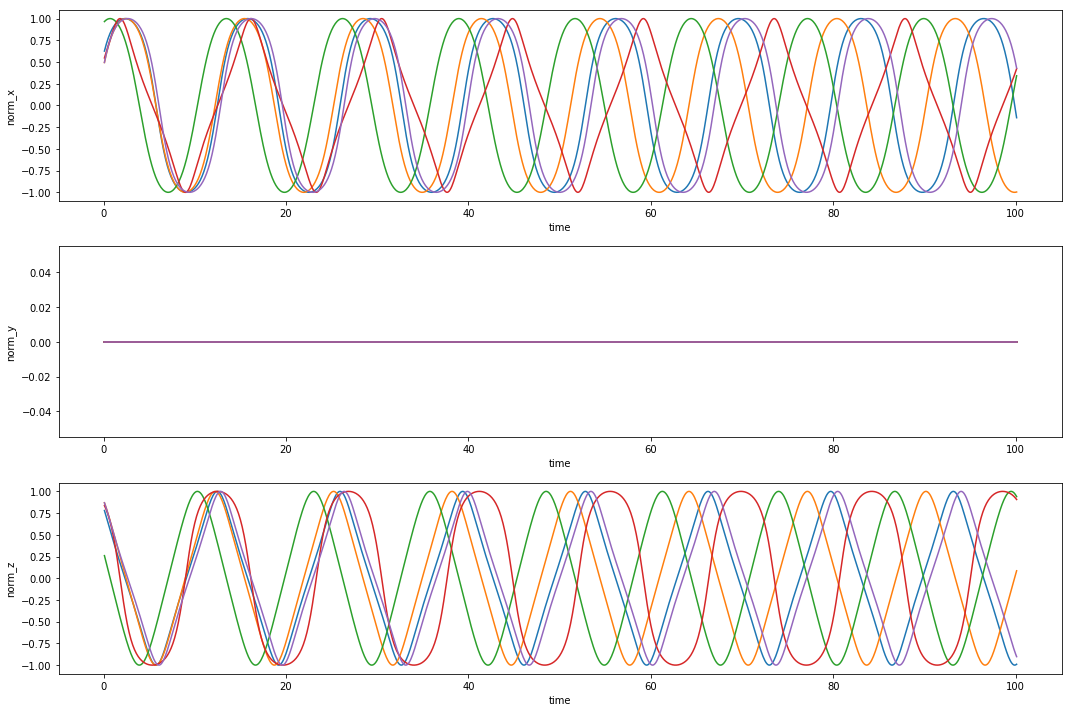

In [13]:
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
t0 = np.arange(max_iter) * eval_dt + eval_dt
for i0, ellipse_obj in enumerate(ellipse_obj_list[:5]):
    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)
    ax0.plot(t0, norm_hist[:, 0], label=i0)
    ax1.plot(t0, norm_hist[:, 1], label=i0)
    ax2.plot(t0, norm_hist[:, 2], label=i0)
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    axi.set_xlabel('time')
    axi.set_ylabel('norm_%s' % axyi)
    # axi.legend()
plt.tight_layout()

In [76]:
import importlib
importlib.reload(jm)

alpha = 1
eval_dt = 0.001
max_iter = 10
fileHandle = 'SingleStokesletsJefferyProblem'

#     norm = np.random.sample(3)
norm = np.array((1, 0, 0))
center = np.array((1, 1, 1))
ellipse_kwargs = {'name':     'ellipse0',
                  'center':   center,
                  'norm':     norm / np.linalg.norm(norm),
                  'velocity': 0.000,
                  'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
problem = jm.SingleStokesletsJefferyProblem(StokesletsStrength=(1, 0, 0))
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))

center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)
print(norm_hist)

0.0 -0.19245008972987526 0.19245008972987526
0.0 -0.19226501142163066 0.19226501142163066
0.0 -0.1920801822744559 0.1920801822744559
0.0 -0.1918956019388857 0.1918956019388857
0.0 -0.19171127006567623 0.19171127006567623
0.0 -0.19152718630580667 0.19152718630580667
0.0 -0.1913433503104816 0.1913433503104816
0.0 -0.1911597617311327 0.1911597617311327
0.0 -0.1909764202194206 0.1909764202194206
0.0 -0.19079332542723712 0.19079332542723712
SingleStokesletsJefferyProblem: run 10 loops using 0.015948
[[1.00000e+00 1.92450e-04 1.92450e-04]
 [1.00000e+00 3.84715e-04 3.84715e-04]
 [1.00000e+00 5.76795e-04 5.76795e-04]
 [9.99999e-01 7.68691e-04 7.68691e-04]
 [9.99999e-01 9.60402e-04 9.60402e-04]
 [9.99999e-01 1.15193e-03 1.15193e-03]
 [9.99998e-01 1.34327e-03 1.34327e-03]
 [9.99998e-01 1.53443e-03 1.53443e-03]
 [9.99997e-01 1.72541e-03 1.72541e-03]
 [9.99996e-01 1.91620e-03 1.91620e-03]]


SingleStokesletsJefferyProblem: run 10001 loops using 2.445486


<IPython.core.display.Javascript object>


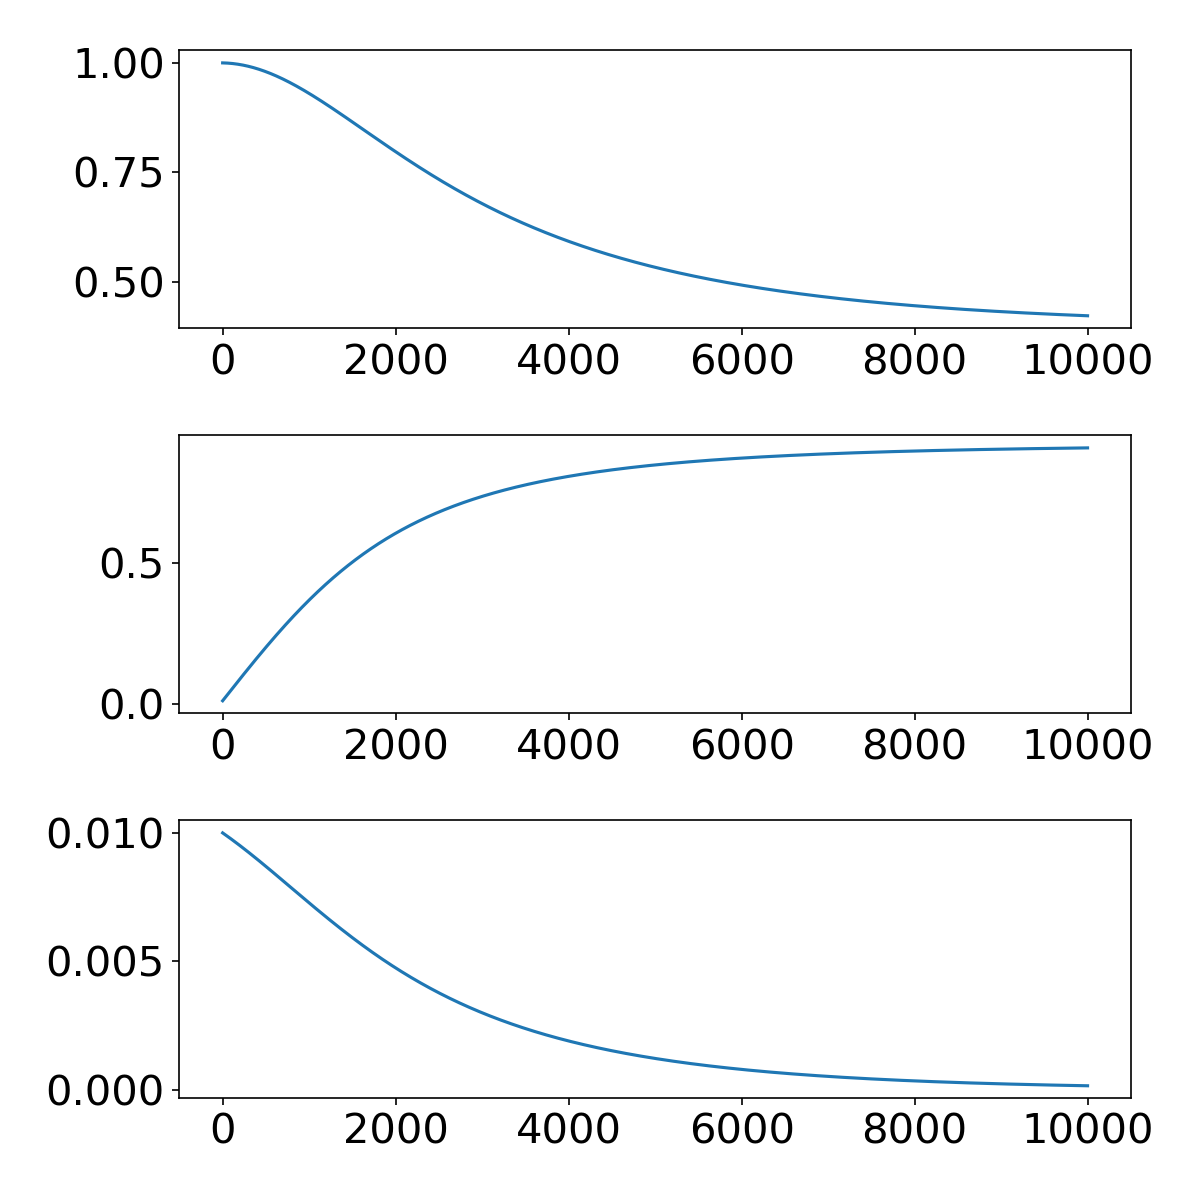

<IPython.core.display.Javascript object>


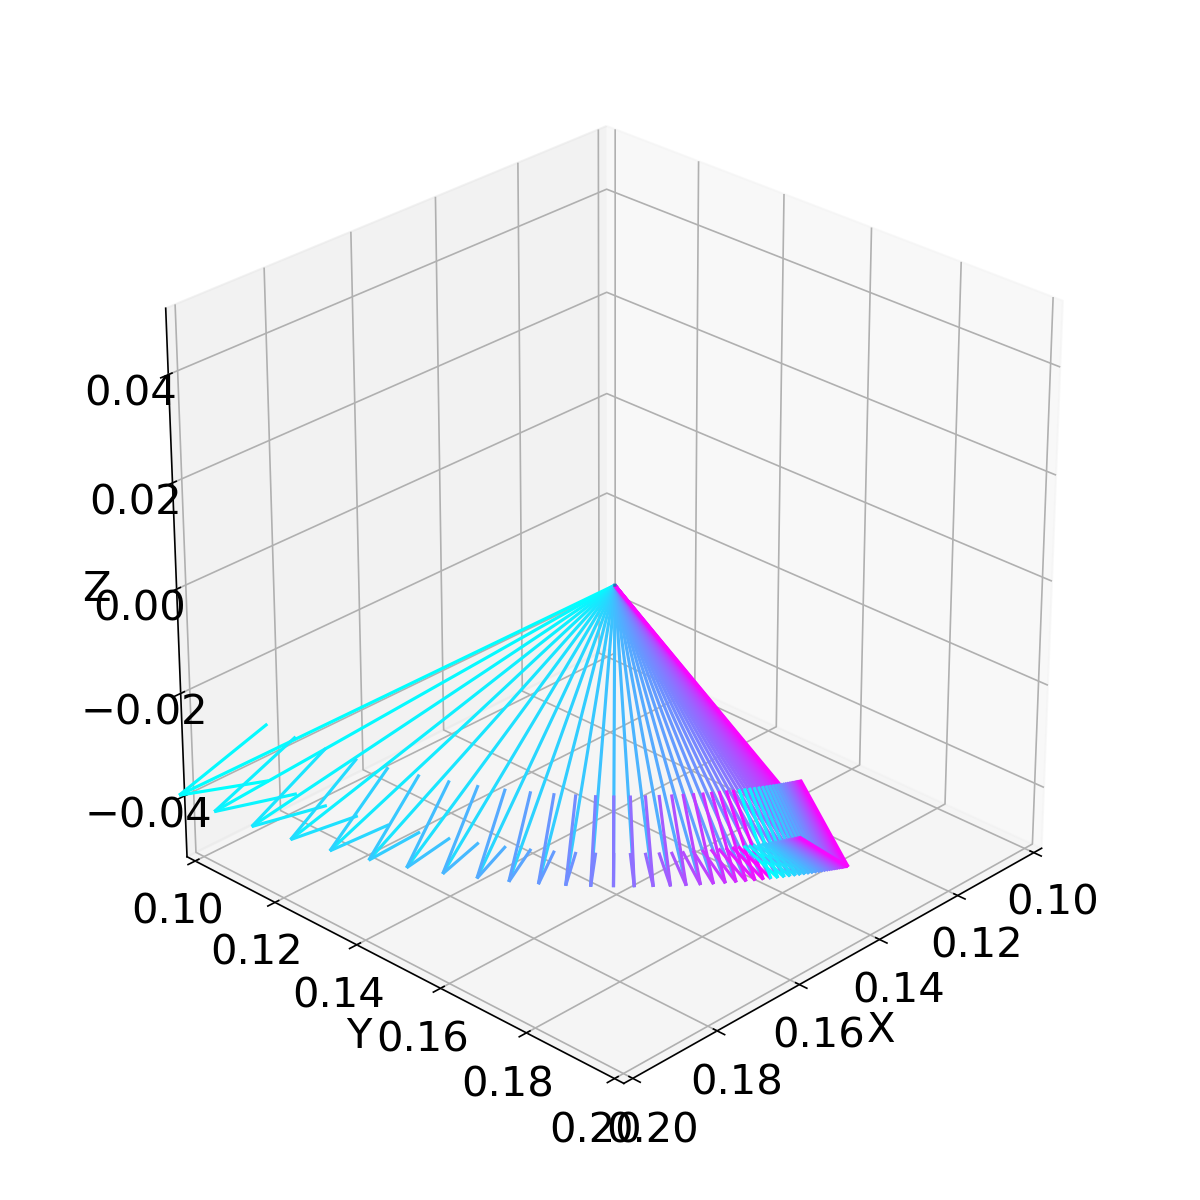

In [178]:
import importlib
importlib.reload(jm)

for i000 in range(1):
    alpha = 0.1
    eval_dt = 0.00001
    max_iter = 10001
    fileHandle = 'SingleStokesletsJefferyProblem'

#     norm = np.random.sample(3)
    norm = np.array((100, 1, 1))
    center = np.array((0.15, 0.15, 0))
    ellipse_kwargs = {'name':     'ellipse0',
                      'center':   center,
                      'norm':     norm / np.linalg.norm(norm),
                      'velocity': 0.000,
                      'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
    ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
    ellipse_obj.dbg_set_update_para(fix_x=0, fix_y=0, fix_z=0)
    problem = jm.SingleStokesletsJefferyProblem(StokesletsStrength=(1, 0, 0))
    problem.add_obj(ellipse_obj)

    # evaluation loop
    t0 = time()
    for idx in range(1, max_iter + 1):
        problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
    t1 = time()
    print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))

    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)

    fig = plt.figure(figsize=(8, 8))
    fig.patch.set_facecolor('white')
    ax0 = fig.add_subplot(3, 1, 1)
    ax1 = fig.add_subplot(3, 1, 2)
    ax2 = fig.add_subplot(3, 1, 3)
    ax0.plot(norm_hist[:, 0])
    ax1.plot(norm_hist[:, 1])
    ax2.plot(norm_hist[:, 2])
    plt.tight_layout()

    t_stp = max_iter // 50
    fig = plt.figure(figsize=(8, 8))
    fig.patch.set_facecolor('white')
    ax0 = fig.add_subplot(1, 1, 1, projection='3d')
    cm = plt.get_cmap('cool')
    color_len = center_hist[::t_stp, 0].size
    colors = [cm(1.*i/color_len) for i in range(color_len)]
    ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
    ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
               norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
               length=0.00001*max_iter, arrow_length_ratio=0.2, pivot='tail', normalize=False, colors=colors)
    spf.set_axes_equal(ax0)
    ax0.set_xlabel('X')
    ax0.set_ylabel('Y')
    ax0.set_zlabel('Z')
    ax0.set_title('')
    plt.tight_layout()

In [118]:
import importlib
importlib.reload(jm)

alpha = 1
eval_dt = 0.001
max_iter = 10
fileHandle = 'HalfSpaceJefferyProblem'

#     norm = np.random.sample(3)
norm = np.array((1, 1, 1))
center = np.array((1, 1, 1))
ellipse_kwargs = {'name':     'ellipse0',
                  'center':   center,
                  'norm':     norm / np.linalg.norm(norm),
                  'velocity': 0.000,
                  'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
problem = jm.HalfSpaceJefferyProblem(h=1, StokesletsStrength=(1, 0, 0))
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))

center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)
print(norm_hist)

HalfSpaceJefferyProblem: run 10 loops using 0.014924
[[0.57735 0.57736 0.57735]
 [0.57734 0.57737 0.57734]
 [0.57734 0.57737 0.57734]
 [0.57733 0.57738 0.57734]
 [0.57733 0.57739 0.57733]
 [0.57732 0.5774  0.57733]
 [0.57732 0.57741 0.57733]
 [0.57731 0.57742 0.57733]
 [0.57731 0.57742 0.57732]
 [0.5773  0.57743 0.57732]]


HalfSpaceJefferyProblem: run 50001 loops using 53.884843


<IPython.core.display.Javascript object>


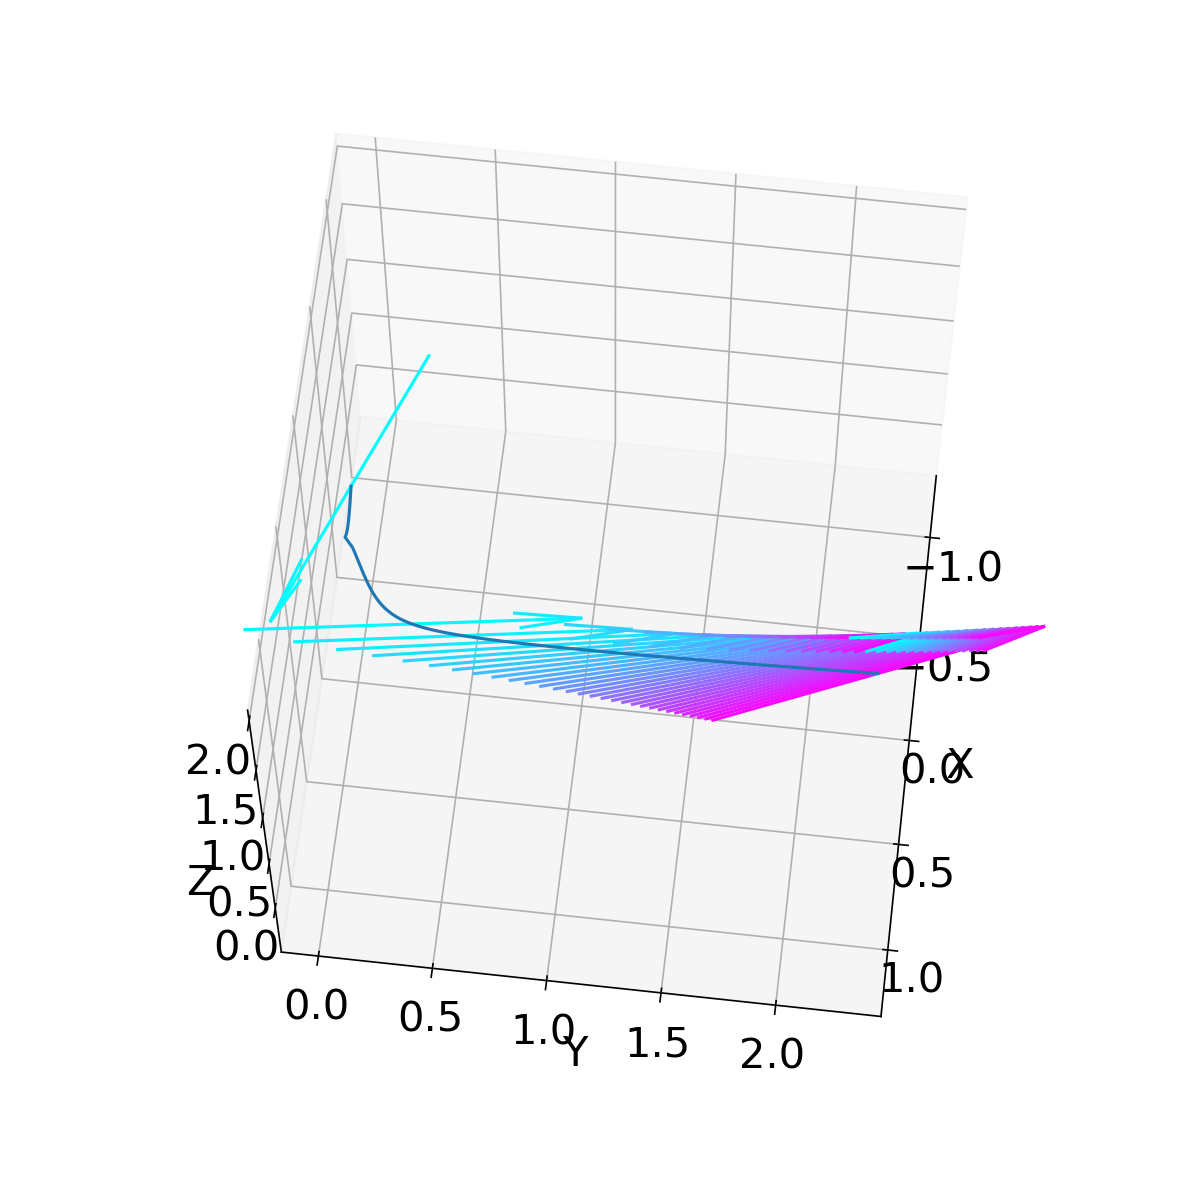

In [127]:
import importlib
importlib.reload(jm)

for i000 in range(1):
    alpha = 10
    eval_dt = 0.01
    max_iter = 50001
    fileHandle = 'HalfSpaceJefferyProblem'

#     norm = np.random.sample(3)
    norm = np.array((6, -2, 1))
    center = np.array((0, 0.05, 1.5))
    ellipse_kwargs = {'name':     'ellipse0',
                      'center':   center,
                      'norm':     norm / np.linalg.norm(norm),
                      'velocity': 0.000,
                      'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
    ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
    problem = jm.HalfSpaceJefferyProblem(h=1, StokesletsStrength=(0, 0, -1))
    problem.add_obj(ellipse_obj)

    # evaluation loop
    t0 = time()
    for idx in range(1, max_iter + 1):
        problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
    t1 = time()
    print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))

    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)

#     fig = plt.figure(figsize=(8, 8))
#     fig.patch.set_facecolor('white')
#     ax0 = fig.add_subplot(3, 1, 1)
#     ax1 = fig.add_subplot(3, 1, 2)
#     ax2 = fig.add_subplot(3, 1, 3)
#     ax0.plot(norm_hist[:, 0])
#     ax1.plot(norm_hist[:, 1])
#     ax2.plot(norm_hist[:, 2])
#     plt.tight_layout()

    t_stp = max_iter // 30
    fig = plt.figure(figsize=(8, 8))
    fig.patch.set_facecolor('white')
    ax0 = fig.add_subplot(1, 1, 1, projection='3d')
    cm = plt.get_cmap('cool')
    color_len = center_hist[::t_stp, 0].size
    colors = [cm(1.*i/color_len) for i in range(color_len)]
    ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
    ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
               norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
               length=0.00003*max_iter, arrow_length_ratio=0.2, pivot='middle', normalize=False, colors=colors)
    spf.set_axes_equal(ax0)
    ax0.set_xlabel('X')
    ax0.set_ylabel('Y')
    ax0.set_zlabel('Z')
    ax0.set_title('')
    plt.tight_layout()